# IOPS Comparison

In [1]:
%run 'common/plot_iops.py'

### IOPS - HP - 256GB - 15NS100WT9JW

In [2]:
plot_measurement_window_tabular('hp/iops/2')

---

### IOPS - RockPro64 - 256GB - 15NS100WT9JW

In [3]:
plot_measurement_window_tabular('rockpro64/iops/1')

---

### IOPS - RockPro64 - 256GB - 55MS101IT9JW

In [4]:
plot_measurement_window_tabular('rockpro64/iops/4')

---

### IOPS - RockPro64 - 128GB - 75AS1011T9HW

In [5]:
plot_measurement_window_tabular('rockpro64/iops/2')

---

### IOPS - RockPro64 - 128GB - 75AS1005T9HW

In [6]:
plot_measurement_window_tabular('rockpro64/iops/3')

---

In [7]:
import sys

from matplotlib.ticker import MultipleLocator

_DIR = 'dir'
_MARKER = 'marker'

def plot_iops_comp(profiles):
    block_sizes_chunk_length = 4

    for chunk_start in np.arange(0,
                                 len(BLOCK_SIZES),
                                 block_sizes_chunk_length):
        chunk_end = min(chunk_start + block_sizes_chunk_length, len(BLOCK_SIZES))
        _, ax = __create_subplots()

        platforms = []
        bars = []
        block_sizes_in_chunk = list(reversed(BLOCK_SIZES))[chunk_start:chunk_end]
        for plat, attrs in profiles.items():
            platforms.append(plat)
            dirname = attrs[_DIR]
            for bs in block_sizes_in_chunk:
                avg_values = []

                for rwmixread in RWMIXREADS:
                    _, values = __get_avg_iops(dirname, bs, rwmixread)
                    avg_values.append(np.mean(util.get_values_in_window(values)))

                bars.append(ax.errorbar(
                    [__get_rwmix_read2write(rwmixread) for rwmixread in RWMIXREADS],
                    avg_values,
                    fmt=attrs[_MARKER]))

            # reset the color cycle
            # https://stackoverflow.com/a/24283087
            ax.set_prop_cycle(None)

        ax.yaxis.set_minor_locator(MultipleLocator(1000))
        ax.grid(which='major', alpha=0.5)
        ax.grid(which='minor', alpha=0.2)

        ax.set_ylabel('IOPS')
        ax.set_xlabel('R/W Mix %')

        ax.add_artist(plt.legend(
            bars[:len(block_sizes_in_chunk)],
            block_sizes_in_chunk,
            ncol=block_sizes_chunk_length,
            loc=8,
            bbox_to_anchor=(0.5, 1),
            frameon=False))
        plt.legend(bars[::block_sizes_chunk_length],
                   platforms,
                   prop={'size': 8})

        plt.title('IOPS Comparison - ' + platforms[0] + ' vs. ' + platforms[1], y=1.12)
        plt.show()

def plot_diff_tabular(profiles):
    rwmixread_tds = ''
    for rwmixread in RWMIXREADS:
        rwmixread_tds += '<td><b>{rwmixread}/{rwmixwrite}</b></td>'.format(
            rwmixread=rwmixread,
            rwmixwrite=(100 - rwmixread))

    avg_iops_trs = ''
    for bs in BLOCK_SIZES:
        avg_iops_tds = '<td><b>{bs}</b></td>'.format(bs=bs)
        for rwmixread in RWMIXREADS:
            max_avg_val = -1
            min_avg_val = sys.maxsize
            for _, attrs in profiles.items():
                dirname = attrs[_DIR]
                _, values = __get_avg_iops(dirname, bs, rwmixread)
                avg_value = np.mean(util.get_values_in_window(values))
                max_avg_val = max(max_avg_val, avg_value)
                min_avg_val = min(min_avg_val, avg_value)

            avg_iops_tds += '<td>{diff_value:.2%}</td>'.format(
                diff_value=(max_avg_val - min_avg_val) / min_avg_val)

        avg_iops_trs += '<tr>' + avg_iops_tds + '</tr>'

    tabular_data = '''\
    <table>
      <caption><b>IOPS Difference in %- ALL RW Mix & BS - Tabular Data</b></caption>
      <tr>
        <td rowspan="2"><b>Block Size</b></td>
        <td colspan="{num_rwmixreads}"><b>Read / Write Mix %</b></td>
      </tr>
      <tr>
        {rwmixread_tds}
      </tr>
      {avg_iops_trs}
    </table>\
    '''.format(
        num_rwmixreads=len(RWMIXREADS),
        rwmixread_tds=rwmixread_tds,
        avg_iops_trs=avg_iops_trs)

    display(HTML(tabular_data))

### HP vs. RockPro64

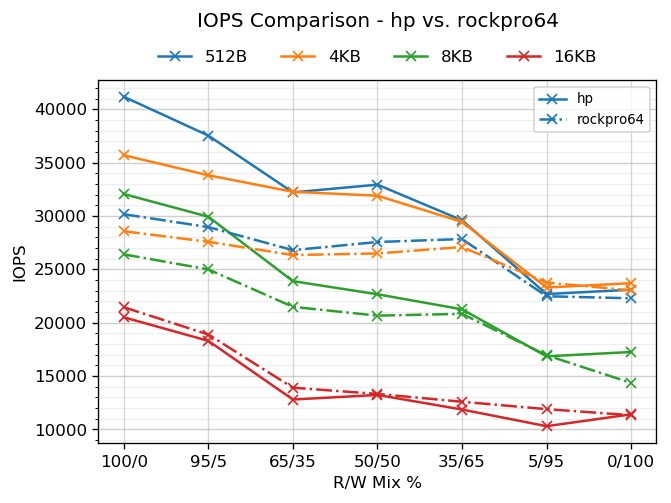

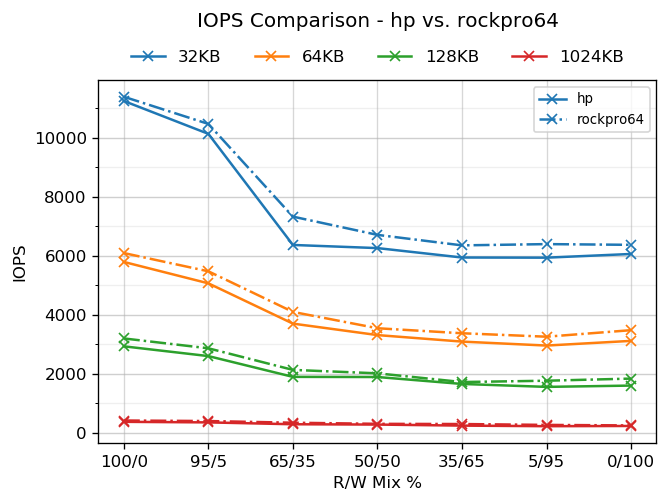

In [8]:
plot_iops_comp({
    'hp':        {_DIR: 'hp/iops/2',
                  _MARKER: '-x'},
    'rockpro64': {_DIR: 'rockpro64/iops/1',
                  _MARKER: '-.x'}
})

All the numbers from these two test platforms do not suffer from CPU performance limitation.

---
### Verification Comparison for Results from **RockPro64**

#### 256GB-15NS100WT9JW vs. 128GB-75AS1011T9HW

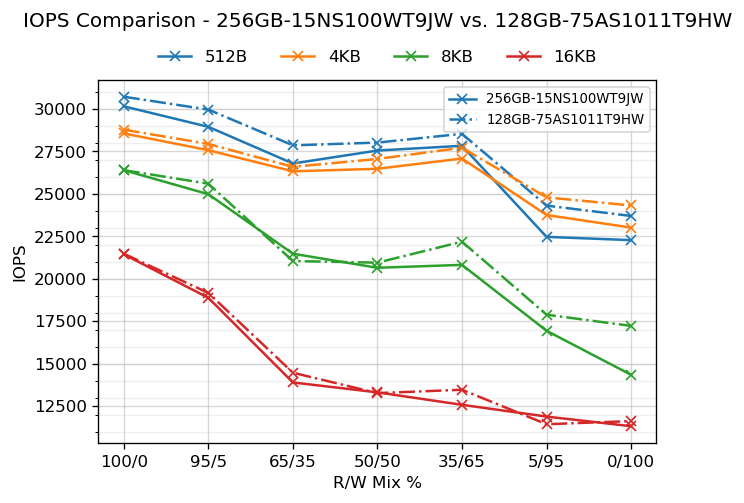

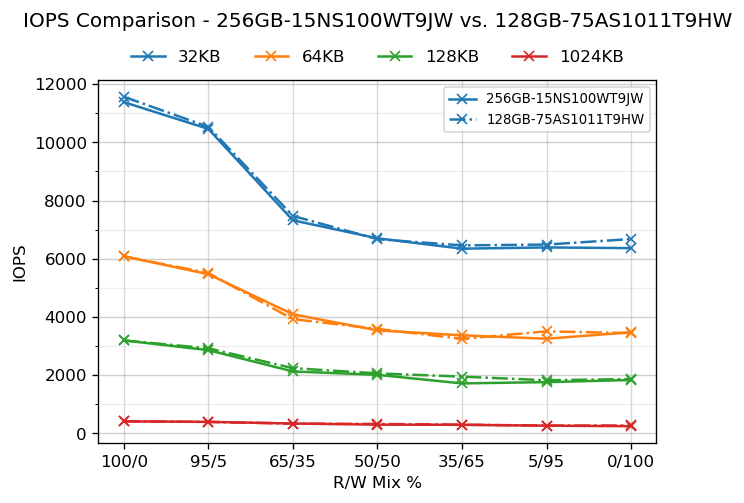

In [9]:
plot_iops_comp({
    '256GB-15NS100WT9JW': {_DIR: 'rockpro64/iops/1',
                           _MARKER: '-x'},
    '128GB-75AS1011T9HW': {_DIR: 'rockpro64/iops/2',
                           _MARKER: '-.x'}
})

This is where we see the IOPS differences on these two drives. As the write percentage increase and the block size decreases, the more observable differences we can see. **The greatest difference is 2879.93 (20.1%) at 8KB 0/100.** Again, no CPU performance limitation is observed for all tests.

#### 256GB-55MS101IT9JW vs. 128GB-75AS1011T9HW

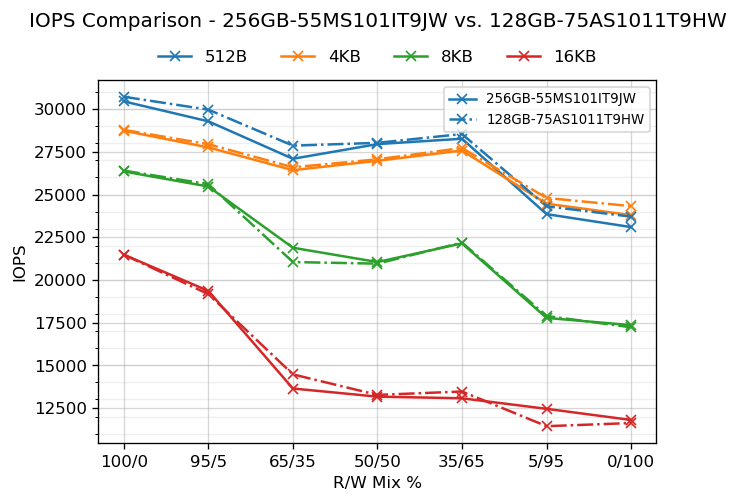

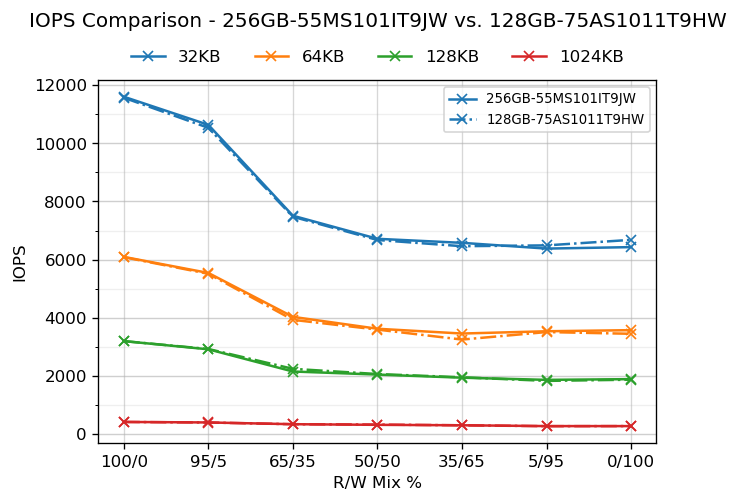

In [10]:
plot_iops_comp({
    '256GB-55MS101IT9JW': {_DIR: 'rockpro64/iops/4',
                           _MARKER: '-x'},
    '128GB-75AS1011T9HW': {_DIR: 'rockpro64/iops/2',
                           _MARKER: '-.x'}
})

**The greatest difference is 1016.38 (8.9% < 10%) at 16KB 5/95.** Thus, the result profiles of these two are still consistent.

#### 128GB-75AS1011T9HW vs. 128GB-75AS1005T9HW

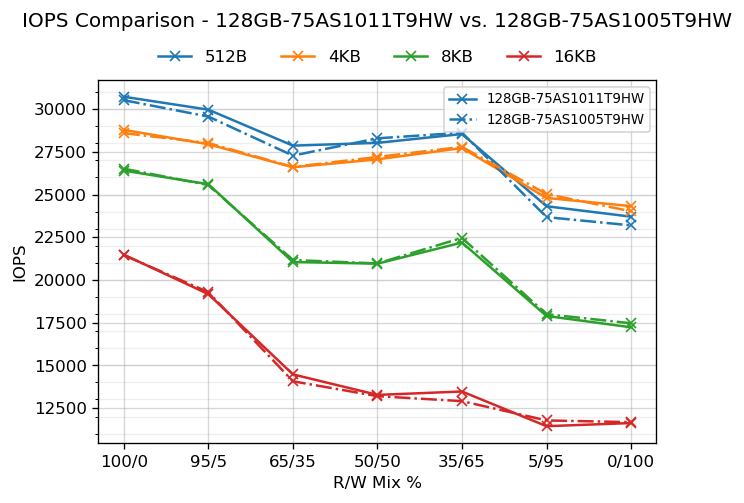

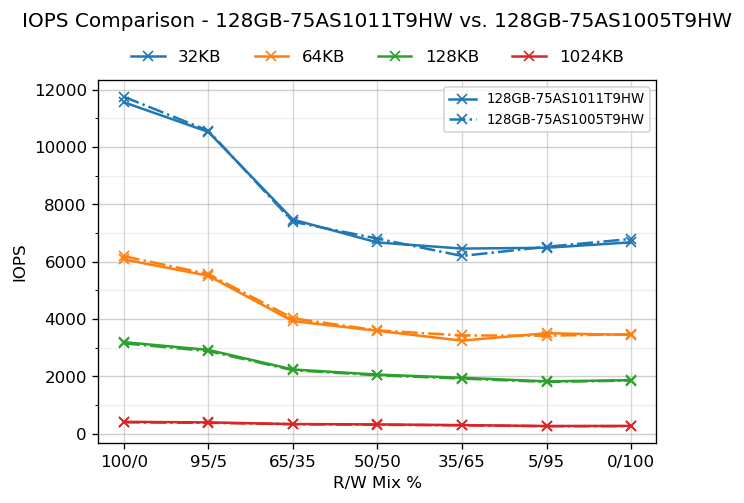

In [11]:
plot_iops_comp({
    '128GB-75AS1011T9HW': {_DIR: 'rockpro64/iops/2',
                           _MARKER: '-x'},
    '128GB-75AS1005T9HW': {_DIR: 'rockpro64/iops/3',
                           _MARKER: '-.x'}
})

The two identical SSD drives are expected to have the same IOPS values under the same tests, and they do.

#### 256GB-15NS100WT9JW vs. 256GB-55MS101IT9JW

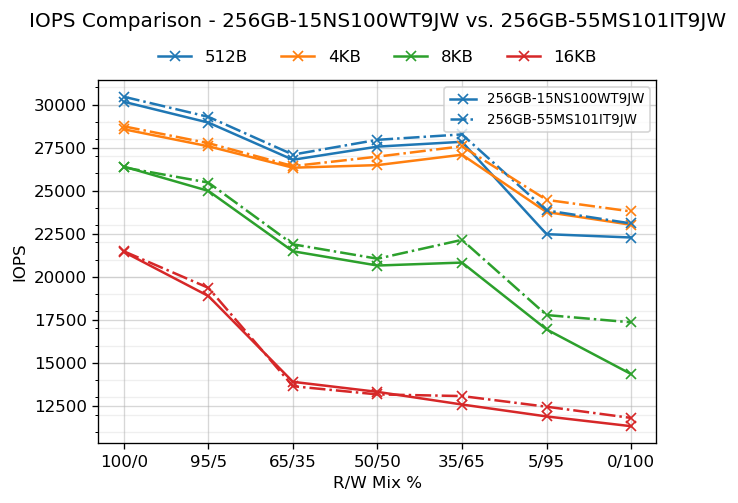

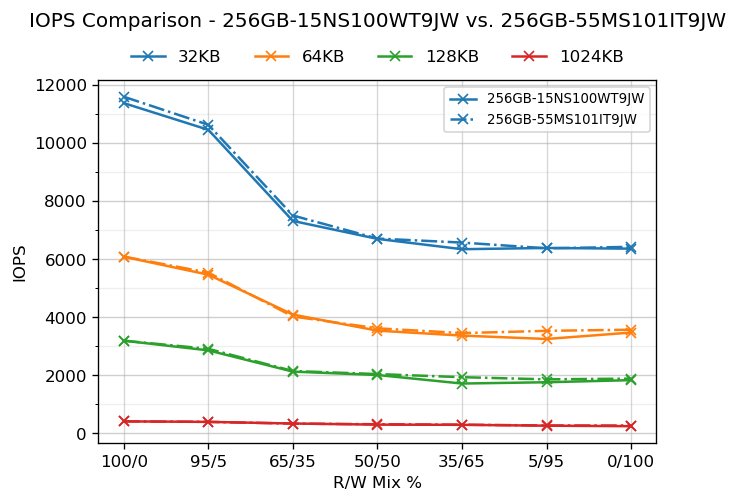

In [12]:
plot_iops_comp({
    '256GB-15NS100WT9JW': {_DIR: 'rockpro64/iops/1',
                           _MARKER: '-x'},
    '256GB-55MS101IT9JW': {_DIR: 'rockpro64/iops/4',
                           _MARKER: '-.x'}
})

**The greatest difference is 3005.65 (20.9%) at 8KB 0/100.** We think the result profiles of these two 256GB SSDs are **NOT** consistent.

---
---
---
After discarded the 256GB 15NS100WT9JW SSD, we finally go back to what we want.

First, let's see the consistent results for the `128GB-75AS1011T9HW` drive from Philip Kufeldt's RockPro64 board and Jianshen Liu's RockPro64 board.

#### Platform comparison between Philip Kufeldt's and Jianshen Liu's RockPro64 board with the **128GB-75AS1011T9HW** drive

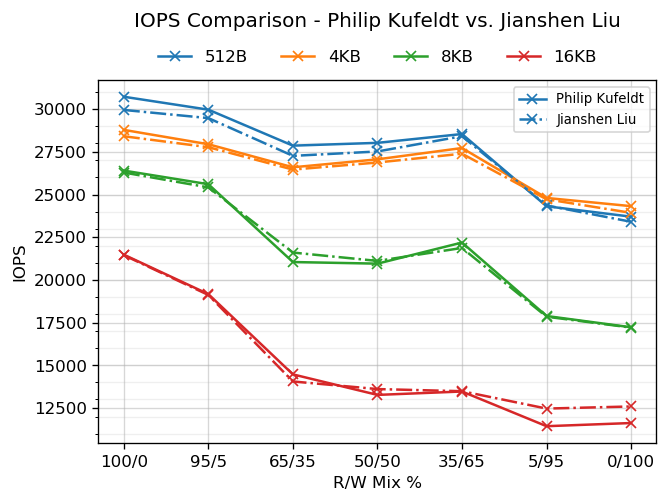

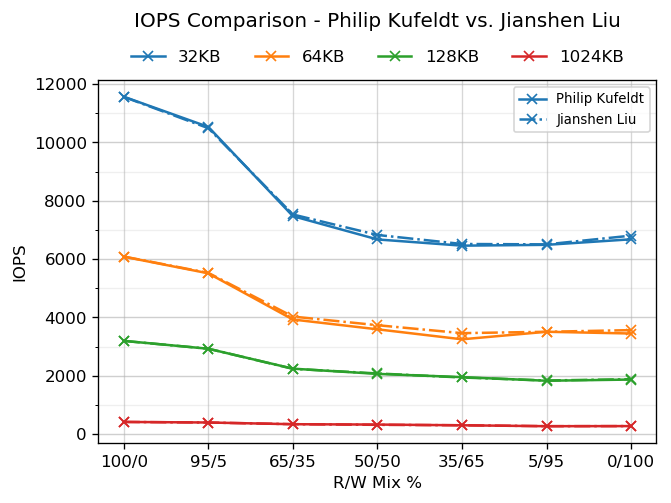

In [13]:
plot_iops_comp({
    'Philip Kufeldt': {_DIR: 'rockpro64/iops/2',
                       _MARKER: '-x'},
    'Jianshen Liu':   {_DIR: 'rockpro64/iops/5',
                       _MARKER: '-.x'}
})

**The greatest difference is 1030.94 (9.0% < 10%) at 16KB 5/95.** Thus, the result profiles of these two are still consistent.

We also compare the `256GB-55MS101IT9JW` drive on these two RockPro64 platforms to make sure our testbeds are identical.

#### Platform comparison between Philip Kufeldt's and Jianshen Liu's RockPro64 board with the **256GB-55MS101IT9JW** drive

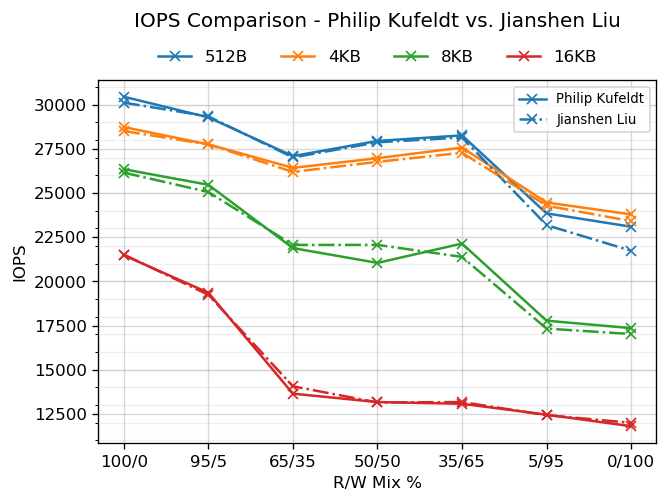

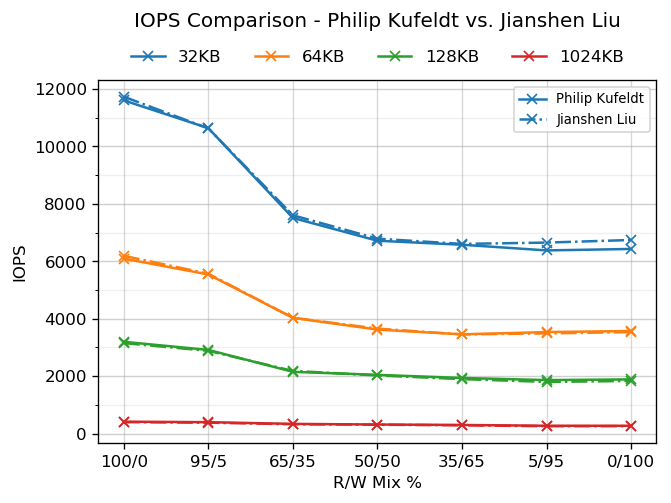

In [14]:
plot_iops_comp({
    'Philip Kufeldt': {_DIR: 'rockpro64/iops/4',
                       _MARKER: '-x'},
    'Jianshen Liu':   {_DIR: 'rockpro64/iops/6',
                       _MARKER: '-.x'}
})

**The greatest difference is 1357.80 (6.2% < 10%) at 512B 0/100.** Thus, the result profiles of these two are still consistent.

---
---
---

Based on the above analysis, we think the drive **128GB-75AS1011T9HW** is stable enough across 2 RockPro64 platforms and other drives of the same model. We will use this drive in the test platform in all later steps. (Performance of drive 256GB-55MS101IT9JW is also stable but here we just don't use this one.)

#### Platform IOPS comparison with drive **128GB-75AS1011T9HW**

In [15]:
plot_measurement_window_tabular('hp/iops/3')
plot_measurement_window_tabular('rockpro64/iops/5')

---

---

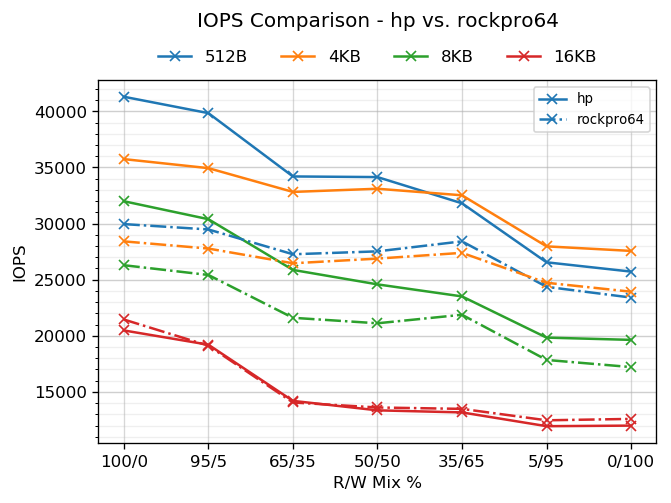

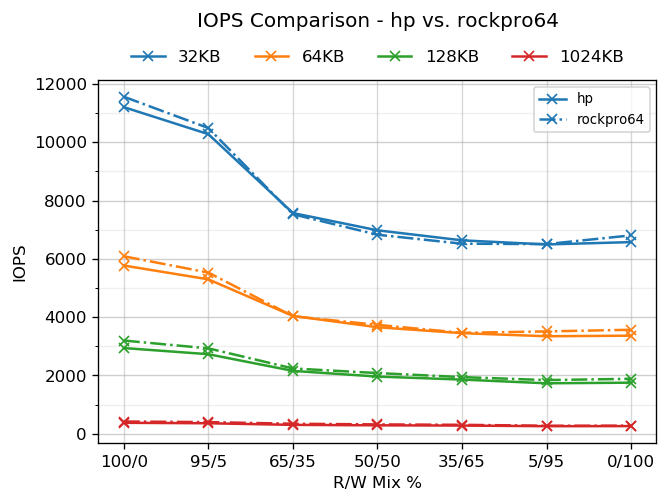

In [16]:
profiles = {
    'hp':        {_DIR: 'hp/iops/3',
                  _MARKER: '-x'},
    'rockpro64': {_DIR: 'rockpro64/iops/5',
                  _MARKER: '-.x'}
}
plot_iops_comp(profiles)

All the above results from platform `HP` and `RockPro64` with the drive **128GB-75AS1011T9HW** do not have CPU performance bottleneck. While for the `8KB`, `4KB` and `512B` results, the `HP` platform performs much better than the `RockPro64` platform.

In [17]:
plot_diff_tabular(profiles)

The two platform differs at most **37.88%** at (512B, R/W Mix % = 100/0).

#### Platform IOPS comparison with drive **256GB-55MS101IT9JW**

In [18]:
plot_measurement_window_tabular('hp/iops/4')
plot_measurement_window_tabular('rockpro64/iops/6')

---

---

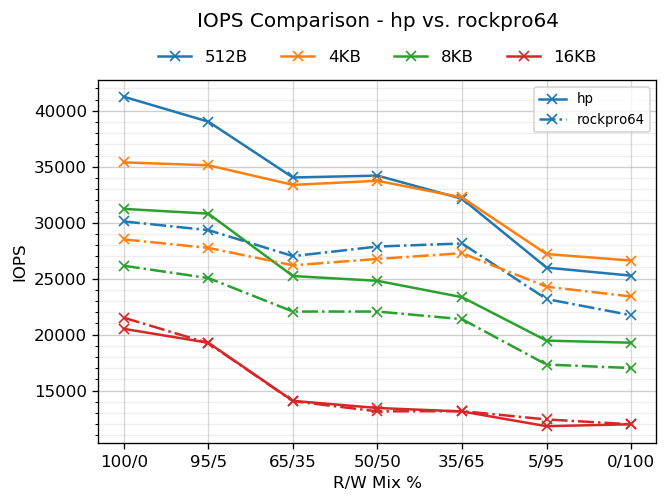

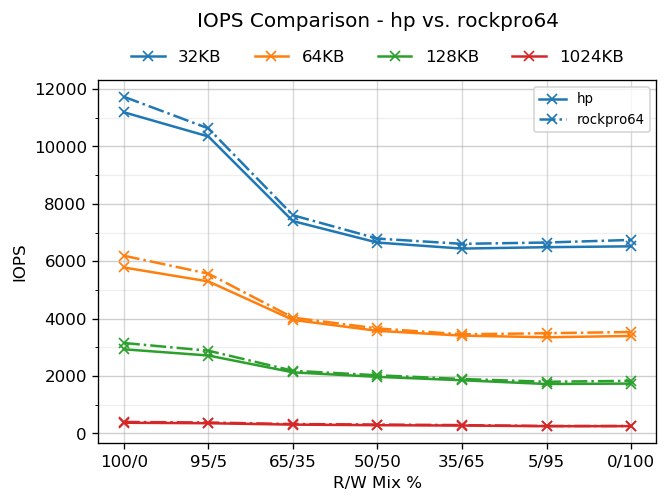

In [19]:
profiles = {
    'hp':        {_DIR: 'hp/iops/4',
                  _MARKER: '-x'},
    'rockpro64': {_DIR: 'rockpro64/iops/6',
                  _MARKER: '-.x'}
}
plot_iops_comp(profiles)

In [20]:
plot_diff_tabular(profiles)

The results look very similar to the above comparison with drive **128GB-75AS1011T9HW**.

#### **128GB-75AS1011T9HW** vs. **256GB-55MS101IT9JW** on **HP** platform

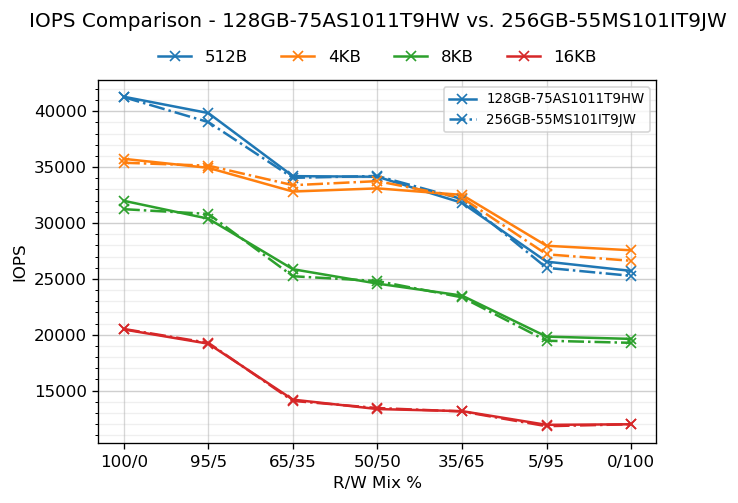

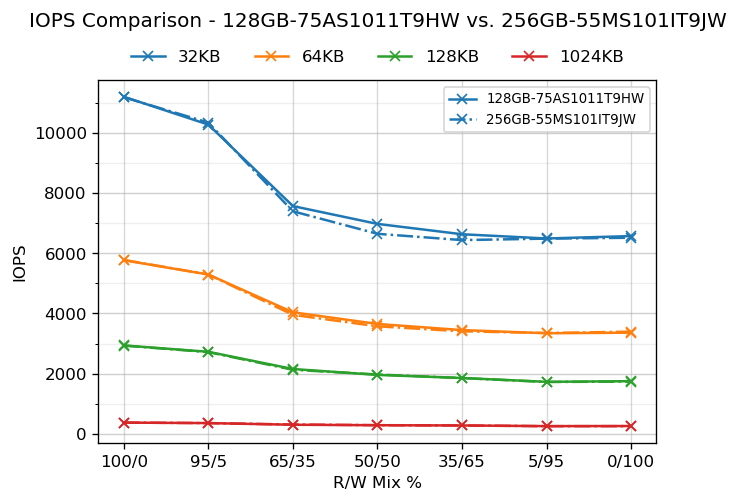

In [21]:
profiles = {
    '128GB-75AS1011T9HW': {_DIR: 'hp/iops/3',
                           _MARKER: '-x'},
    '256GB-55MS101IT9JW': {_DIR: 'hp/iops/4',
                           _MARKER: '-.x'}
}
plot_iops_comp(profiles)
plot_diff_tabular(profiles)

Since the results from these two drives on the HP platform are highly consistent, we believe the comparisons with the RockPro64 platform with these two drives are reliable.